In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report, accuracy_score

In [32]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

In [33]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

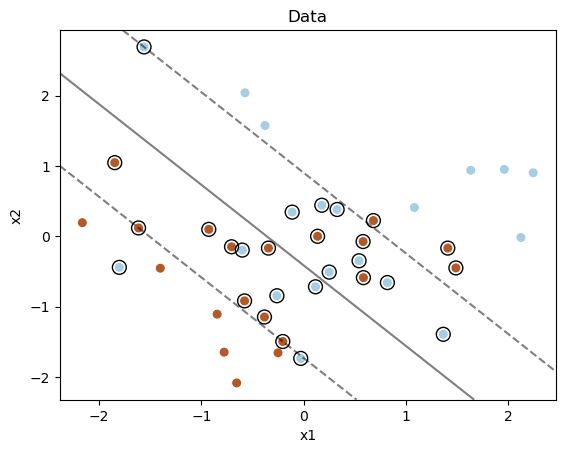

In [34]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

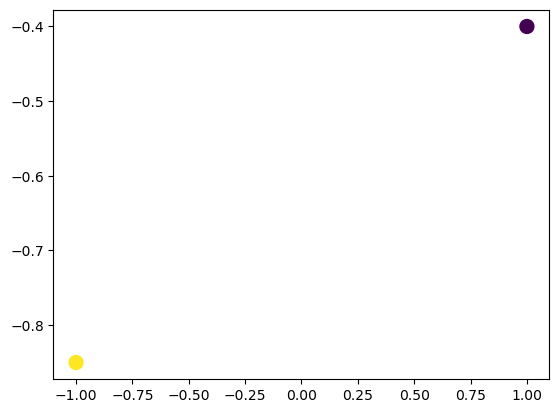

In [35]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

In [36]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


# Zadanie 1


In [37]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target_names'] = df['target'].apply(lambda x: data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


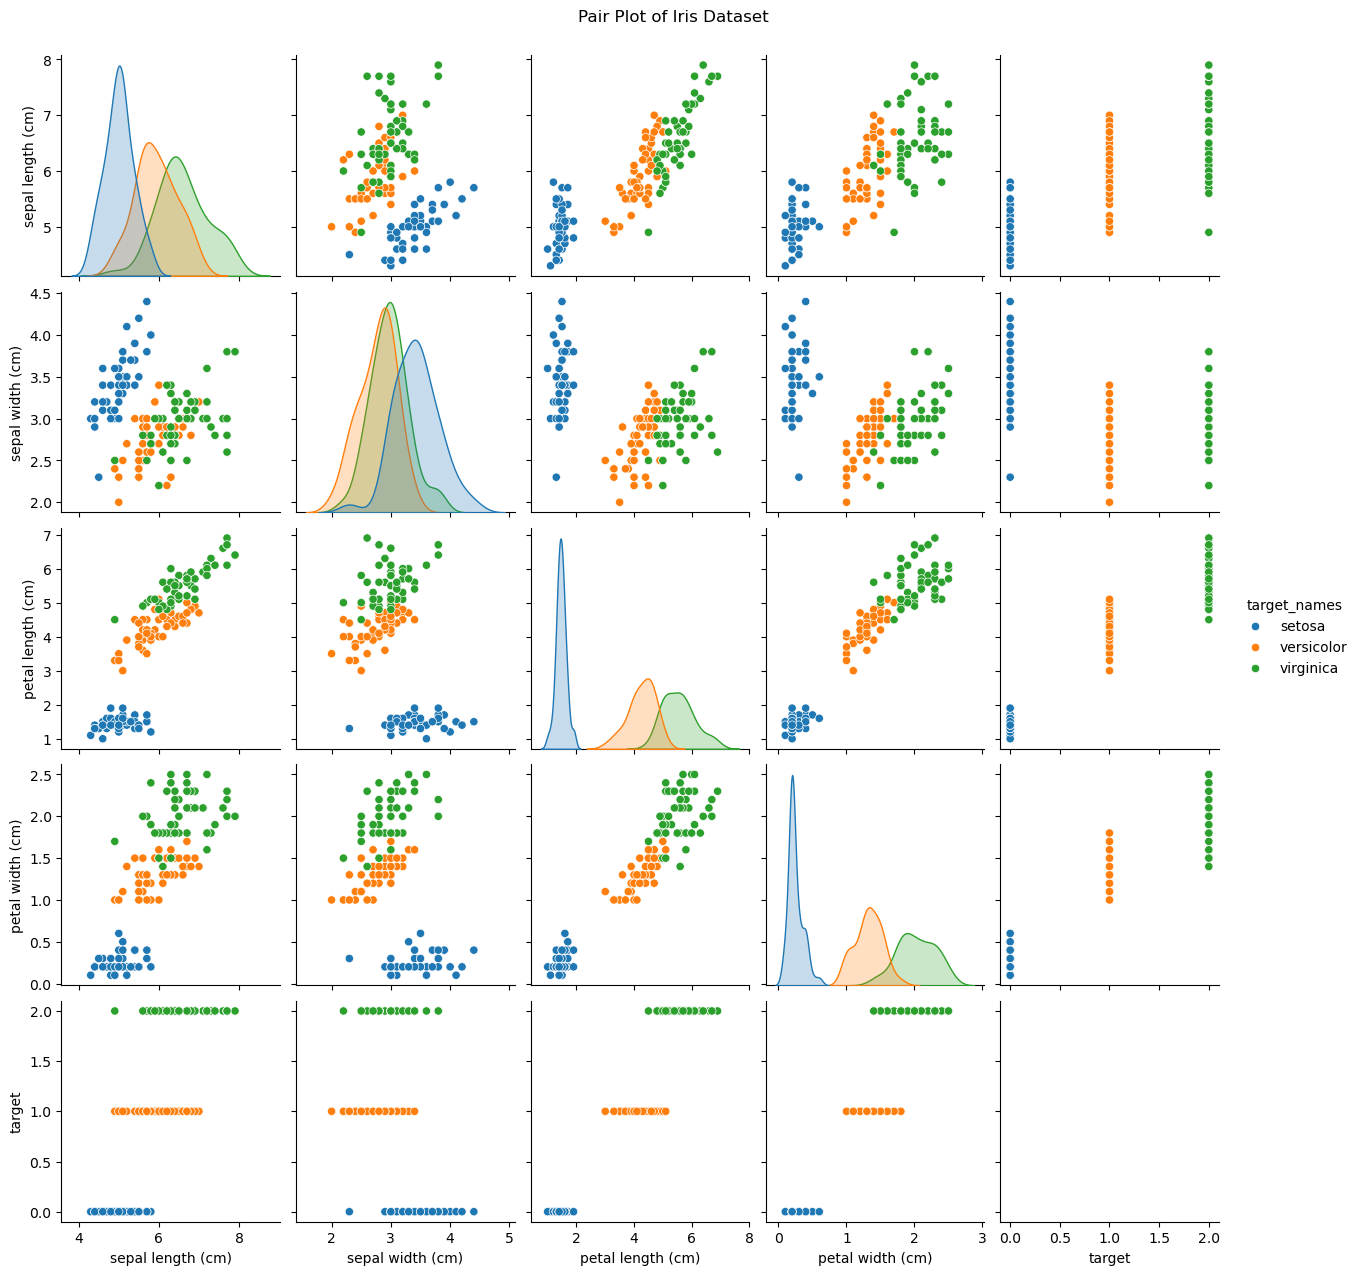

In [38]:
sns.pairplot(df, hue='target_names', diag_kind='kde')
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

⚙️  Class 0 vs Rest - Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

⚙️  Class 1 vs Rest - Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        32
           1       0.43      0.23      0.30        13

    accuracy                           0.69        45
   macro avg       0.58      0.55      0.55        45
weighted avg       0.65      0.69      0.66        45

⚙️  Class 2 vs Rest - Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.69      0.85      0.76        13

    accuracy                           0.84        45
   macro avg     

C:\Users\Tomek\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


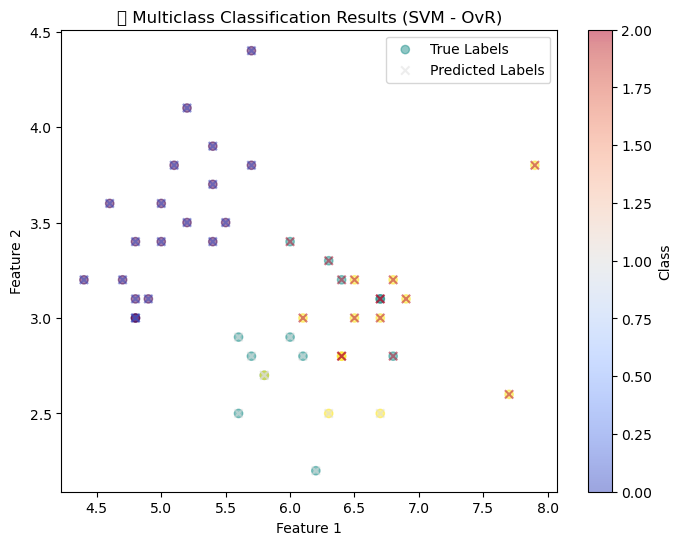

📄 Raport końcowy:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



In [ ]:
# 1. Wczytanie danych
X = data.data
y = data.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)



# Dla wizualizacji użyjemy tylko 2 pierwszych cech
X = X[:, :2]

# 2. Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. One-vs-Rest – trenujemy oddzielny klasyfikator SVM dla każdej klasy
classifiers = {}
predictions_prob = []

for class_label in np.unique(y):
    # Tworzymy etykiety binarne: 1 dla aktualnej klasy, 0 dla reszty
    y_train_binary = (y_train == class_label).astype(int)
    y_test_binary = (y_test == class_label).astype(int)

    # Trenujemy klasyfikator
    clf = svm.SVC(kernel='linear', C=1000, probability=True, random_state=1)
    clf.fit(X_train, y_train_binary)
    classifiers[class_label] = clf

    # Ocena klasyfikatora binarnego
    y_pred_binary = clf.predict(X_test)
    acc = accuracy_score(y_test_binary, y_pred_binary)
    print(f"⚙️  Class {class_label} vs Rest - Accuracy: {acc:.2f}")
    print(classification_report(y_test_binary, y_pred_binary))

    # Przechowujemy prawdopodobieństwa dla każdej klasy
    predictions_prob.append(clf.predict_proba(X_test)[:, 1])  # prawdopodobieństwo klasy pozytywnej

# 4. Finalna predykcja wieloklasowa
# Wybieramy klasę z najwyższym prawdopodobieństwem z OvR
# Dla każdego punktu testowego wybiera klasę, dla której prawdopodobieństwo jest najwyższe (spośród trzech binarnych klasyfikatorów OvR).
# np.argmax(axis=0) wybiera indeks klasy z największym prawdopodobieństwem → końcowa predykcja.
predictions_prob = np.array(predictions_prob)
y_pred_multiclass = np.argmax(predictions_prob, axis=0)

# 5. Wizualizacja
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', label='True Labels', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_multiclass, cmap='coolwarm', marker='x', label='Predicted Labels', alpha=0.5)
plt.title("📊 Multiclass Classification Results (SVM - OvR)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='best')
plt.colorbar(label='Class')
plt.show()

# 6. Raport końcowy
print("📄 Raport końcowy:")
print(classification_report(y_test, y_pred_multiclass, target_names=data.target_names))
